In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# Part 1) Load the data and make a datetime index

In [2]:
df = pd.read_csv('C:/Users/Dell/Downloads/london_weather_MODIFIED - london_weather_MODIFIED (1).csv')
df.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


Convert the date column to datetime dtype

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

Set the date column as the index.

In [5]:
df = df.set_index('date')
df.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


### Filter out only the required data:


Keep only data from the year 2000 or later.


Keep only the following features:


* precipitation


* mean_temp


* min_temp


* max_temp


* snow_depth

In [6]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head(10)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
2000-01-06,0.0,8.9,7.0,11.0,0.0
2000-01-07,2.0,7.2,3.4,9.2,0.0
2000-01-08,0.0,7.4,5.7,7.2,0.0
2000-01-09,0.2,3.2,-0.7,7.8,0.0


In [7]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [9]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [10]:
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations 

## Q1: What month had the most precipitation between 2000 through 2010?

In [12]:
temp_cols = ['precipitation', 'snow_depth']
temp_df  = df.loc["2000":"2010",temp_cols]
temp_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


In [19]:
ts = df['precipitation'].copy()


Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method

In [20]:
ts_MS_res = ts.resample("MS").sum()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()

date
2000-01-01    14.3
2000-02-01    62.2
2000-03-01    13.4
2000-04-01    71.8
2000-05-01    68.4
Freq: MS, Name: Resampled, dtype: float64

Find the date and corresponding value for the max precipitation.

In [25]:
df_plot= df[df['precipitation']==df['precipitation'].max()]
print(df_plot)

            precipitation  mean_temp  min_temp  max_temp  snow_depth
date                                                                
2015-08-26           51.6       17.0      14.1      19.6         0.0


Plot the feature and time period that corresponds to the question.

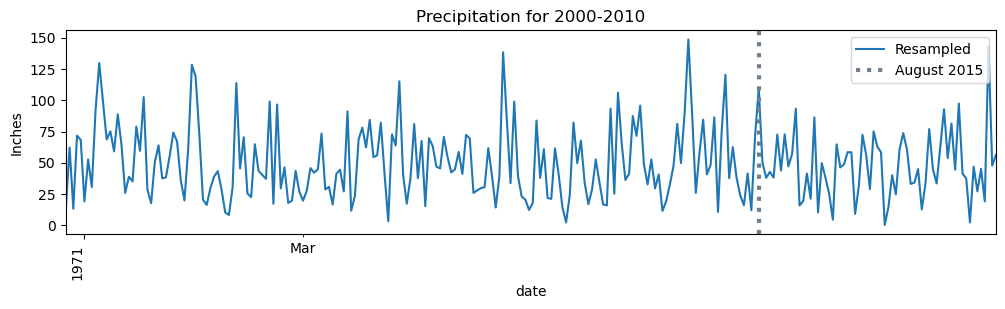

In [44]:
fig, ax = plt.subplots(figsize=(12,3))
ts_MS_res.plot(ax=ax)

ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

major_loca =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loca)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc =  mdates.MonthLocator(3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)
ax.axvline('2015-08-26', color='slategray',ls=':',lw=3, label= 'August 2015' )
ax.legend()
fig.autofmt_xdate(which='major',rotation=90)


## Q2: Which year between 2000-2020 had the coolest average temperature?

In [37]:
temp_cols = [ 'mean_temp']
temp_df  = df.loc["2000":"2020",temp_cols]
temp_df

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.

In [38]:
ts1 = df['mean_temp'].copy()

In [39]:
ts_MS_res1 = ts1.resample("MS").mean()
ts_MS_res1.name = 'Resampled'
ts_MS_res1.head()

date
2000-01-01     5.614516
2000-02-01     7.181034
2000-03-01     8.491935
2000-04-01     8.996667
2000-05-01    13.798387
Freq: MS, Name: Resampled, dtype: float64

Plot the feature and time period that corresponds to the question

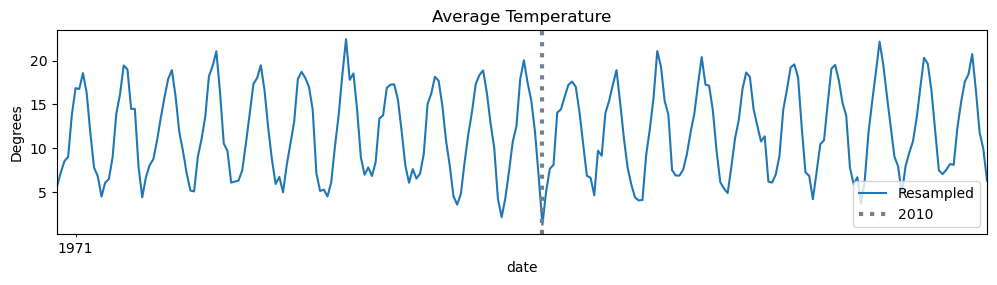

In [46]:
fig, ax = plt.subplots(figsize=(12,3))
ts_MS_res1.plot(ax=ax)
ax.set(title='Average Temperature', ylabel='Degrees')

major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc =  mdates.YearLocator(1)
minor_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)
ax.axvline('2010-12-20', color='slategray',ls=':',lw=3, label= '2010' )

ax.legend()
fig.autofmt_xdate(which='major',rotation=90)


Determine the year and value for the lowest mean temp.

In [42]:
df_min= df[df['mean_temp']==df['mean_temp'].min()]
print(df_min)

            precipitation  mean_temp  min_temp  max_temp  snow_depth
date                                                                
2010-12-20            0.0       -4.1      -9.4       1.8         5.0
